# RQ4

**In most cases, we will not have a __consistent dataset__, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.**

   **1. Write a function that, given a profile_id, will be able to return the posts that belong to the given *profile_id*.**
   
   **2. Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the *profile.csv* using the previously written function.**
     
   **3. What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in *profile.csv*?**
    
   **4. Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.**


# 4.1

**Function which returns all the post published by the account with id = profile_id that are present in the posts_dataframe**

In [11]:
def find_posts_byId(profile_id,posts_dataframe):
    return posts_dataframe[posts_dataframe.profile_id == profile_id]

**TEST**

In [2]:
import pandas as pd
import numpy as np
import random
import logging

In [7]:
posts_dataframe =  pd.read_csv("~/Downloads/instagram_posts.zip",delimiter="\t",nrows= 4000000)

In [4]:
profile_dataframe = pd.read_csv("~/Downloads/instagram_profiles.zip",delimiter="\t")

**Random profile_id from dataset**

In [8]:
id1 = posts_dataframe.profile_id[random.randint(0,4000000)]
id1
id2 = 623386236.0

**Function that execute find_posts_byId and checks for errors in the output**

In [9]:
def check_test(profile_id,posts_dataframe):
    correct  = posts_dataframe[posts_dataframe.profile_id == np.float64(profile_id)].shape[0]
    test = find_posts_byId(profile_id,posts_dataframe)
    if(test.shape[0] == correct) :
        print("Function find_posts_byId is working")
    else:
        print("Function find_posts_byId is incorrect")

In [12]:
check_test(id1,posts_dataframe)
check_test(id2,posts_dataframe)

Function find_posts_byId is working
Function find_posts_byId is working


# 4.2

In [13]:
def posts_top_profiles(n,posts_dataframe,profile_dataframe):
    top_posted_profiles = profile_dataframe.sort_values('n_posts',ascending=False).profile_id.head(n)    
    output_posts = []
    for id in top_posted_profiles:
        output_posts.append(find_posts_byId(id,posts_dataframe))
    result = pd.concat(output_posts)
    return result
    

**TEST**

In [14]:
top_posted_profiles = profile_dataframe.sort_values('n_posts',ascending=False).profile_id.head(10)    
print(top_posted_profiles)
display(posts_top_profiles(10,posts_dataframe,profile_dataframe))

3990313    1.996648e+08
2571453    8.563367e+09
4338921    1.273455e+09
3942129    9.813508e+06
4219642    1.607309e+09
2207897    1.087614e+09
4313908    1.603890e+09
4219476    2.181730e+08
4236057    2.855497e+08
1631526    8.312603e+09
Name: profile_id, dtype: float64


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
2700732,31109333,3621669,BuUnJu0Al2B,9.813508e+06,3.448613e+08,2019-02-25 23:47:25.000,2,NaN,1,0
2701237,31109320,3621669,BuUoORyAH_f,9.813508e+06,3.448613e+08,2019-02-25 23:56:40.000,1,NaN,1,0
2701238,31109325,3621669,BuUnmnCgUzr,9.813508e+06,3.448613e+08,2019-02-25 23:51:27.000,2,NaN,4,0
2701239,31109327,3621669,BuUnj84AFkT,9.813508e+06,3.448613e+08,2019-02-25 23:50:53.000,1,NaN,1,0
2701240,31109328,3621669,BuUnSeIgm2f,9.813508e+06,3.448613e+08,2019-02-25 23:48:30.000,1,NaN,0,0
233067,28607526,3851869,ByAFx7gnNhZ,1.607309e+09,2.448736e+08,2019-05-28 11:36:28.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,1,0
241977,28616591,3851869,BxtZ7__Fosq,1.607309e+09,3.621726e+14,2019-05-21 05:27:02.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,0,0
319192,28694641,3851869,ByB2YpbnoZs,1.607309e+09,2.086910e+05,2019-05-29 04:00:25.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,4,0
637098,29019247,3851869,BwUPb5dFZCR,1.607309e+09,9.268474e+14,2019-04-16 14:22:51.000,1,📞 สนใจตัวช่วย#dwfifteen🔥เพิ่มการเผาผลาญไขมัน\n...,1,0
1300143,29693418,3851869,ByJwLb5nTZ-,1.607309e+09,2.509223e+08,2019-06-01 05:40:06.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,0,0


# 4.3

**Collect all the posts published by the top 10 profiles who posted more**

In [15]:
averages = posts_top_profiles(10,posts_dataframe,profile_dataframe)

**Compute the average number of likes and comments for each profile  who is in the top 10 profiles with the most number of posts**

In [16]:
averages.groupby("profile_id")[['numbr_likes','number_comments']].mean()  

,numbr_likes,number_comments
profile_id,,
9.813508e+06,1.400000,0.0
1.087614e+09,0.333333,0.0
1.603890e+09,2.500000,0.0
1.607309e+09,1.888889,0.0


# 4.4

In [17]:
from collections import defaultdict
import matplotlib.pyplot as plt
from datetime import datetime

**Functions written in the RQ3 file**

In [18]:
def posts_cts_manager(post_dataframe):
    posts_dataframe['cts'] = pd.to_datetime(posts_dataframe.cts).dt.time

def time_interval(time_list,posts):
    counter  = defaultdict()
    for time in time_list:
        interval = time[0].strftime("%H:%M:%S")+" "+time[1].strftime("%H:%M:%S")
        counter[interval] = 0
        for date in posts['cts']:
            if(time[0]<= date and time[1]>=date):
                counter[interval] += 1
    hist  = plt.bar(range(len(list(counter.keys()))), counter.values(), color='g')
    print("Histogram with the quantity of post publications for each interval given as input:")
    i= 0
    for key in counter.keys():
        print( "Interval "+str(i)+" = "+key)
        i+=1
    return hist

**Pass the time intervals as input of  time_interval() function**

In [19]:
input_t = [['06:00:00','10:59:59'],['11:00:00','13:59:59'],['14:00:00','16:59:59'],['17:00:00', '19:59:59'],['20:00:00','23:59:59'],['00:00:00','02:59:59'],['03:00:00','05:59:59']]
time_list = []
for interval in input_t:
    row  = []
    row.append(datetime.strptime(interval[0], '%H:%M:%S').time())
    row.append(datetime.strptime(interval[1],'%H:%M:%S').time())
    time_list.append(row)

**Execute time_interval function with the input built in the cell above on the posts of the top10 profiles with the most number of posts**

In [24]:
target_posts = posts_top_profiles(10,posts_dataframe,profile_dataframe)    

In [26]:
#execute this cell ONLY if the profile_dataframe and posts_dataframe have just been loaded in the file
#posts_cts_manager(target_posts)

Histogram with the quantity of post publications for each interval given as input:
Interval 0 = 06:00:00 10:59:59
Interval 1 = 11:00:00 13:59:59
Interval 2 = 14:00:00 16:59:59
Interval 3 = 17:00:00 19:59:59
Interval 4 = 20:00:00 23:59:59
Interval 5 = 00:00:00 02:59:59
Interval 6 = 03:00:00 05:59:59


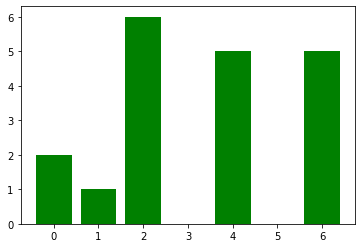

In [25]:
time_interval(time_list,target_posts)
plt.show()

# CONCLUSION
The plot shows us that the top10 profiles prefer to post in the time that goes from 14 pm to 17 pm.
This result links with the result given by other studies that puts this time interval as the best for instagram accounts to publish a post because in this period of the day the post is seen by the most of the account's followers 